In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from FileCrawler import crawl
from CreateDataset import *
import pandas as pd
import imutils
plt.rcParams["figure.figsize"] = (7,7)


In [3]:
all_triggers = crawl("/run/media/mateusz/Seagate Expansion Drive/20190330Subset/N1", analyze, debug=True)
np.save("out.npy", all_triggers, allow_pickle=True)

Analyzing file 0/497 (0.0%)
Analyzing file 1/497 (0.2012072434607646%)
Analyzing file 2/497 (0.4024144869215292%)
Analyzing file 3/497 (0.6036217303822937%)
Analyzing file 4/497 (0.8048289738430584%)
Analyzing file 5/497 (1.0060362173038229%)


In [4]:
rows = []
for trigger in all_triggers:
    start, end = trigger.bounding_box
#     trigger.show()
    rows.append(
        [trigger.filename, trigger.start_frame, trigger.end_frame, start.x, start.y, end.x, end.y,trigger.length ,trigger.magnitude])

df = pd.DataFrame(
        data=rows,
        columns=["file", "start_frame", "end_frame", "box_up_left_x", "box_up_left_y", "box_down_right_x",
                  "box_down_right_y","length" ,"count"])

df.to_csv("out.csv")
df

,file,start_frame,end_frame,box_up_left_x,box_up_left_y,box_down_right_x,box_down_right_y,length,count
0,/run/media/mateusz/Seagate Expansion Drive/201...,28,38,720,748,728,806,57.558666,11
1,/run/media/mateusz/Seagate Expansion Drive/201...,27,33,491,754,504,802,50.000000,7
2,/run/media/mateusz/Seagate Expansion Drive/201...,38,46,1056,355,1077,434,83.432608,9


In [5]:
df.sort_values(["length"], ascending=False, inplace=True)

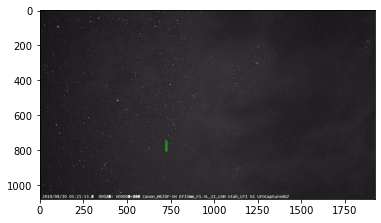

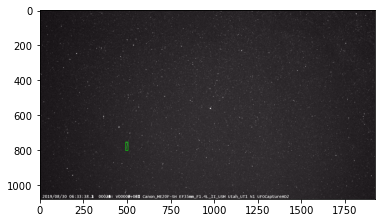

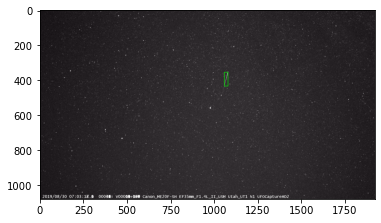

In [7]:
%matplotlib inline
for trigger in all_triggers:
    show_trigger(trigger)

In [8]:
%matplotlib
show_trigger(all_triggers[-1])

Using matplotlib backend: TkAgg
